## INTRO

Clustering is a method of unsupervised learning that involves grouping of data into specific groups based on their similarities.

In theory, data points that are in the same group should have similar features, while data points that are in different groups should have highly dissimilar features.

## WHAT IS CLUSTERING USED FOR?
1. It is used in recommendation engines. For example, similar products on Amazon will be grouped together and recommended to users.

2. It is used in customer segmentation for retention, marketing campaigns, etc.

3. It is used in fraud detection.

There are various ways clustering is done, but for this project we are going to focus on K-Means clustering, which is one of the most popular clustering algorithm and uses the Euclidean distance by default to calculate the nearest neighbours. K-Means is easy to understand and implement in code, The K in K-Means represents the number of clusters.

## HOW K-MEANS CLUSTERING ALGORITHM WORKS

#### Worked Example:

Imagine you have thousands of customer records, and you want to group them for a special segmented offer or campaign.

1st: We need to determine how many groups of customers we want to have. So, if we want to have 5 groups, K = 5.

2nd: We will select K (in this case 5) random distinct points called centroids. For each group, this will be our reference points for clustering our data.

3rd: We will measure the distance between our first point and the 5 selected clusters, assign the data point to the cluster which is the nearest and calculate the average which becomes the new centroid.

4th: We find the distance of the 2nd point and assign it to the nearest cluster. This step is repeated several times until we reach the end.

## HOW DO WE DECIDE THE NUMBER OF CLUSTERS?

The number of clusters that we choose for the algorithm should not be random. Each and every cluster id formed by calculating and comparing the mean distances of each data points within a cluster from its centroid.

We can choose the right number of clusters with the help of the Within-Cluster-Sum-of-Sqaures (WCSS) method. There are other methods that can be used, but for this lesson we are going to focus on the WCSS method.

WCSS stands for sum of the squares of the distances of the data points in each and every cluster from its centroid. The main idea here is to minimize the distance between the data points and the centroids of the clusters. The process is iterated until we reach a minimum for the sum distances.


#### Business Problem

Given the country dataset, classify the data into clusters

#### Data Collection/Gathering

In [2]:
# importing our usual libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# sns.set() function allows us to customize the visual style of our Seaborn plots by modifying various settings such as colors, fonts, grid lines, and more.
# This function may be removed in the future, so it’s recommended to use set_theme() directly.
sns.set()

import statsmodels.api as sm

from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_score

We will be working on the country dataset consisting of countries, their latitudes and longitudes

In [ ]:
# to mount my Google Drive in the Colab notebook so that I can be allowed to access files from
# my Drive, such that I can upload and read my dataset into a pandas dataframe.

from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# now, reading the dataset into a pandas df
data = pd.read_csv('/content/drive/MyDrive/countrydata.csv')

In [6]:
# For the purpose of jupyter notebook

data = pd.read_csv('countrydata.csv')

In [7]:
# taking a peek at the df
data.head()

,country_code,latitude,longitude,country,usa_state_code,usa_state_latitude,usa_state_longitude,usa_state
0,AD,42.546245,1.601554,Andorra,AK,63.588753,-154.493062,Alaska
1,AE,23.424076,53.847818,United Arab Emirates,AL,32.318231,-86.902298,Alabama
2,AF,33.939110,67.709953,Afghanistan,AR,35.201050,-91.831833,Arkansas
3,AG,17.060816,-61.796428,Antigua and Barbuda,AZ,34.048928,-111.093731,Arizona
4,AI,18.220554,-63.068615,Anguilla,CA,36.778261,-119.417932,California


Looking at our dataset, we see a number of columns. but for this project, we only need the country, latitude, longitude and usa_state columns. so we will create a new df using only these columns.

In [8]:
df = data[['country', 'latitude', 'longitude', 'usa_state']]

In [9]:
# taking a peek
df.head()

,country,latitude,longitude,usa_state
0,Andorra,42.546245,1.601554,Alaska
1,United Arab Emirates,23.424076,53.847818,Alabama
2,Afghanistan,33.939110,67.709953,Arkansas
3,Antigua and Barbuda,17.060816,-61.796428,Arizona
4,Anguilla,18.220554,-63.068615,California


#### Data Analysis/Cleaning

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    245 non-null    object 
 1   latitude   244 non-null    float64
 2   longitude  244 non-null    float64
 3   usa_state  52 non-null     object 
dtypes: float64(2), object(2)
memory usage: 7.8+ KB


the .info method indicates there are some missing values. ideally, we should find some better way to deal with the missing values. but in this project, we will drop all missing values

In [11]:
df.dropna(inplace=True)

C:\Users\GCA\AppData\Local\Temp\ipykernel_3144\1379821321.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


In [12]:
# defining our x dataframe
x = df.iloc[:, 1:3]

In [13]:
x.dropna()

,latitude,longitude
0,42.546245,1.601554
1,23.424076,53.847818
2,33.939110,67.709953
3,17.060816,-61.796428
4,18.220554,-63.068615
5,41.153332,20.168331
6,40.069099,45.038189
7,12.226079,-69.060087
8,-11.202692,17.873887
9,-75.250973,-0.071389


now that we have dropped all missing values, we will select all the features we will use for our clustering. we will cluster using the KMeans, and define k as 3. Afterwhich, we will use the .fit method and pass our x, that is, the features we have selected in order to train our model with the dataset.

#### Exploratory Data Analysis (EDA)

No work is being done here

#### Model Building

In [14]:
kmeans = KMeans(3)

#### Model Training

In [15]:
kmeans.fit(x)

C:\Users\GCA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

Now that we have trained our model, the next thing we will do is view the results from our kmeans clustering model. we will predict the results from our kmeans cluster.

#### Model Testing

In [16]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

C:\Users\GCA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([2, 2, 1, 0, 0, 2, 2, 0, 2, 2, 0, 0, 2, 1, 0, 2, 2, 0, 1, 2, 2, 2,
       2, 2, 2, 0, 1, 0, 0, 0, 1, 2, 2, 2, 0, 0, 1, 2, 2, 2, 2, 2, 0, 0,
       2, 1, 0, 0, 0, 2, 1, 2])

As can be seen, we have an array of 7 numbers, which is not very readable. So, we are going to plot our results and visualize them so we can read and understand the results of our clustering better

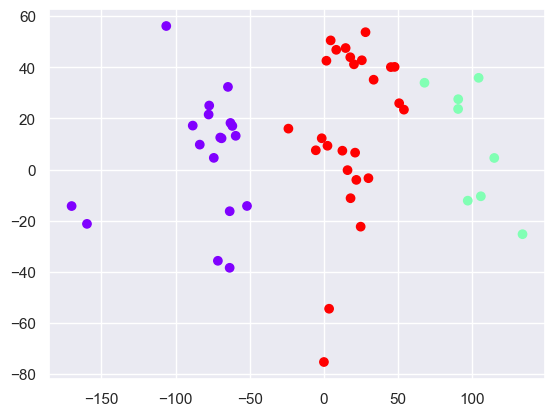

In [17]:
df_with_clusters = df.copy()
df_with_clusters['clusters'] = identified_clusters
plt.scatter(df_with_clusters['longitude'], df_with_clusters['latitude'], c=df_with_clusters['clusters'], cmap='rainbow')

As can be seen from the scatter plot above, we have been able to group the data into 3 exclusive clusters using KMeans clustering model

#### Model Evaluation

In [19]:
# To check/score the performance of our model

silhouette = silhouette_score(x, identified_clusters)
print("Silhouette Score:", silhouette)

Silhouette Score: 0.5085258852637012


Silhouette Score
•	Definition: Measures how similar an object is to its own cluster vs. other clusters.
•	Range: [-1, 1] (Higher is better).
•	Example: A silhouette score of 0.75 indicates well-separated cluste

The Silhouette score above indicates that the model could do betrrs.
